In [1]:
import numpy as np
import tensorboard as tensorboard
import seaborn as seaborn
from tensorflow.python.client import device_lib
import tensorflow as tf
import shap
import os
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kr_helper_funcs as kr
print('tensorflow' + tf.__version__)
print('tensorboard' + tensorboard.__version__)
print('seaborn' + seaborn.__version__)
tf.config.list_physical_devices('GPU')
tf.test.is_built_with_cuda
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices('GPU')
device_lib.list_local_devices()

tensorflow2.2.0
tensorboard2.2.2
seaborn0.10.1
Num GPUs Available:  0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8794504906119522276,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3819043201885196917
 physical_device_desc: "device: XLA_CPU device"]

In [2]:
image_shape =(300, 300, 3)
data_dir="../input/kaggle-catsdogs"
test_path= os.path.join(data_dir, 'test')
os.listdir(test_path)

test_gen = ImageDataGenerator(rescale =1./255)
batch_size=32
test_image_gen= test_gen.flow_from_directory(test_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='categorical',  shuffle=False)
test_image_gen.class_indices

Found 5000 images belonging to 2 classes.


{'cats': 0, 'dogs': 1}

keras is no longer supported, please use tf.keras instead.


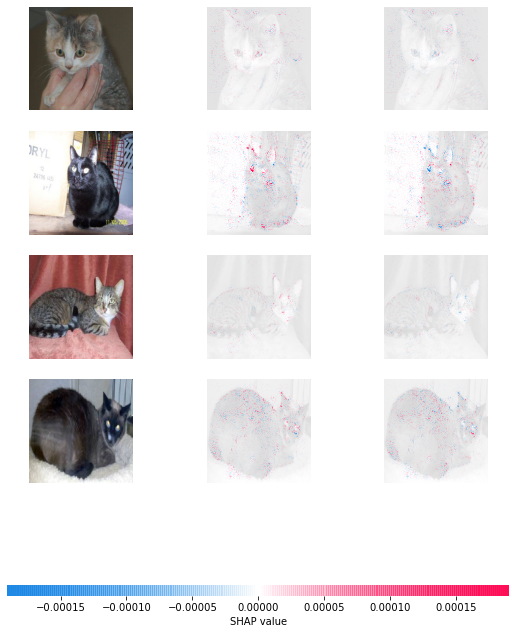

In [3]:
X_test, _ = test_image_gen.next()
background = X_test[np.random.choice(20, 10, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(tf.keras.models.load_model('catsdogs_categorical_h.h5'), background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(X_test[1:5], output_rank_order=2)
shap.image_plot(shap_values=shap_values, pixel_values= X_test[1:5])#, labels=np.array(list(test_image_gen.class_indices)))